<a href="https://colab.research.google.com/github/lemart0/Data_Tesina/blob/main/Tesis_Andy_25_6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análisis de datos
Pasado en limpio del borrador anterior

#**Análisis descriptivos de las variables sociodemográficas**


In [ ]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#accediendo al archivo de interés

ruta ='/content/drive/My Drive/Tesis_andy_data/datos.csv'
df = pd.read_csv(ruta)
#cargado! a ver si los nombres de las columnas están bien

df.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (ipython-input-1-3076340797.py, line 3)

In [ ]:
df.columns
#está todo joya

Index(['Unnamed: 0', 'ID', 'tb_score', 'tb_errors', 'tb_meanrt_correct',
       'tb_meanrt_incorrect', 'ne_score', 'ne_errors', 'ne_meanrt_correct',
       'ne_meanrt_incorrect',
       ...
       'dn_tokens_pal', 'dn_lemmas_pal', 'dmlu_pal', 'dttr_pal', 'dmsttr_pal',
       'dmattr_pal', 'dhdd_pal', 'dmaas_pal', 'dmtld_pal', 'dmtldma_pal'],
      dtype='object', length=207)

In [ ]:
# Información general del dataframe
df.info()

# Estadísticas descriptivas generales de todo
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Columns: 207 entries, Unnamed: 0 to dmtldma_pal
dtypes: float64(192), int64(10), object(5)
memory usage: 111.7+ KB


,Unnamed: 0,ID,tb_score,tb_errors,tb_meanrt_correct,tb_meanrt_incorrect,ne_score,ne_errors,ne_meanrt_correct,ne_meanrt_incorrect,...,dn_tokens_pal,dn_lemmas_pal,dmlu_pal,dttr_pal,dmsttr_pal,dmattr_pal,dhdd_pal,dmaas_pal,dmtld_pal,dmtldma_pal
count,69.000000,69,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,57.000000,57.000000,57.000000,57.000000,56.000000,56.000000,57.000000,57.000000,57.000000,57.000000
unique,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C3A02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,35.000000,NaN,19.380952,4.619048,1034.767746,701.055556,12.809524,5.190476,3385.169064,4045.105726,...,418.789474,146.491228,6.501352,0.415945,0.606834,0.611509,33.959816,0.241694,38.360516,45.666987
std,20.062403,NaN,3.106062,3.106062,219.731105,269.670342,3.995235,3.995235,1215.052480,3278.454084,...,204.872150,48.154930,2.747757,0.077493,0.037777,0.038715,1.723251,0.014579,12.989838,11.192909
min,1.000000,NaN,13.000000,1.000000,674.941176,304.000000,4.000000,1.000000,1910.000000,1322.500000,...,60.000000,29.000000,2.566038,0.273217,0.480000,0.503587,23.513459,0.203325,8.438990,22.000000
25%,18.000000,NaN,16.000000,2.000000,853.823529,548.250000,9.000000,2.000000,2509.250000,2471.666667,...,301.000000,120.000000,5.132353,0.373737,0.585000,0.593877,33.339215,0.232817,29.899864,37.688291
50%,35.000000,NaN,20.000000,4.000000,1037.909091,603.000000,14.000000,4.000000,3187.529412,3057.642857,...,397.000000,145.000000,6.026316,0.408638,0.611250,0.614148,34.262265,0.242627,35.621971,44.529197
75%,52.000000,NaN,22.000000,8.000000,1244.000000,946.000000,16.000000,9.000000,3730.812500,3967.125000,...,502.000000,174.000000,7.041667,0.447301,0.630000,0.634198,34.869235,0.246586,42.471759,51.460993


In [ ]:
#estadística descriptiva solo de las columnas que me interesan en ESTE momento -> SOCIODEMOGRÁFICOS
# Lista de columnas de interés
columnas_interes = [
    'Edad_años',
    'Años_previos_de_escolaridad',
    'Usa_dispositivos_electrónicos_cotidianamente',
    'Libros_en_el_hogar',
    'Frecuencia_de_lectura_compartida',
    'Materiales_didácticos_en_el_hogar',
    'Educación_de_la_madre',
    'Educación_del_padre',
    'Percepción_de_ingresos',
    'Percepción_de_calma'

]

# Filtrar el DataFrame y calcular descriptivas
df[columnas_interes].describe(include='all')

#Andy, fijate solamente en la media, el mínimo y el maximo de las variables. Esto solo debe interpretarse a la luz de cómo se ha codificado cada variable.
#Ejemplo: fijate que en "Mean" de Educación_de_la_madre tenemos el valor de 9.2 .. si vamos a la qué es el 9 en nuestra clasificación, hablamos de universitario incompleto/o en curso.

,Edad_años,Años_previos_de_escolaridad,Usa_dispositivos_electrónicos_cotidianamente,Libros_en_el_hogar,Frecuencia_de_lectura_compartida,Materiales_didácticos_en_el_hogar,Educación_de_la_madre,Educación_del_padre,Percepción_de_ingresos,Percepción_de_calma
count,67.000000,66.000000,67.000000,63.000000,66.000000,67.000000,65.000000,59.000000,65.000000,67.000000
mean,6.183731,3.424242,0.656716,1.952381,2.015152,2.925373,9.200000,7.966102,2.630769,1.373134
std,0.942264,1.436455,0.478389,0.633184,0.999883,0.264772,2.835049,3.194640,0.944875,0.901780
min,4.282000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,1.000000,0.000000
25%,5.539000,2.000000,0.000000,2.000000,1.000000,3.000000,8.000000,5.000000,2.000000,1.000000
50%,6.089000,4.000000,1.000000,2.000000,2.000000,3.000000,10.000000,8.000000,3.000000,1.000000
75%,6.828000,5.000000,1.000000,2.000000,3.000000,3.000000,11.000000,10.500000,3.000000,2.000000
max,7.953000,7.000000,1.000000,3.000000,3.000000,3.000000,14.000000,14.000000,4.000000,3.000000


*Si fueran necesrias las distribuciones de frecuencia de cada rta se hace esto por cada variable categórica!*

In [ ]:
#frecuencias absolutas
niveles_educativos = {
    0: "Primario incompleto",
    1: "Primario en curso",
    2: "Primario completo",
    3: "Secundario incompleto",
    4: "Secundario en curso",
    5: "Secundario completo",
    6: "Terciario incompleto",
    7: "Terciario en curso",
    8: "Terciario completo",
    9: "Universitario incompleto",
    10: "Universitario en curso",
    11: "Universitario completo",
    12: "Posgrado incompleto",
    13: "Posgrado en curso",
    14: "Posgrado completo"
}

In [ ]:
madre_freq = df['Educación_de_la_madre'].value_counts().sort_index()
madre_freq_etiquetas = madre_freq.rename(index=niveles_educativos)
print("Distribución educación de la madre:\n")
print(madre_freq_etiquetas)

Distribución educación de la madre:

Educación_de_la_madre
Secundario incompleto        2
Secundario completo          8
Terciario incompleto         6
Terciario completo          10
Universitario incompleto     4
Universitario en curso       3
Universitario completo      25
Posgrado incompleto          1
Posgrado en curso            1
Posgrado completo            5
Name: count, dtype: int64


In [ ]:
padre_freq = df['Educación_del_padre'].value_counts().sort_index()
padre_freq_etiquetas = padre_freq.rename(index=niveles_educativos)
print("Distribución educación del padre:\n")
print(padre_freq_etiquetas)

Distribución educación del padre:

Educación_del_padre
Secundario incompleto        7
Secundario completo         11
Terciario incompleto         4
Terciario completo          14
Universitario incompleto     4
Universitario en curso       4
Universitario completo       8
Posgrado incompleto          1
Posgrado en curso            2
Posgrado completo            4
Name: count, dtype: int64


In [ ]:
# Frecuencia absoluta
frecuencias = df['Sexo_masculino'].value_counts().sort_index()
print("Frecuencia absoluta:")
print(frecuencias)

# Frecuencia relativa (proporciones)
proporciones = df['Sexo_masculino'].value_counts(normalize=True).sort_index()
print("\nFrecuencia relativa (proporción):")
print(proporciones)

# Frecuencia relativa en porcentaje
porcentajes = proporciones * 100
print("\nFrecuencia relativa (porcentaje):")
print(porcentajes)

Frecuencia absoluta:
Sexo_masculino
0.0    34
1.0    33
Name: count, dtype: int64

Frecuencia relativa (proporción):
Sexo_masculino
0.0    0.507463
1.0    0.492537
Name: proportion, dtype: float64

Frecuencia relativa (porcentaje):
Sexo_masculino
0.0    50.746269
1.0    49.253731
Name: proportion, dtype: float64


In [ ]:
# Asegurate de que los valores sean numéricos y no haya strings
sexo = df['Sexo_masculino']

# N total de casos válidos (no nulos)
N = sexo.count()

# Cantidad de datos perdidos
perdidos = sexo.isnull().sum()

# Media (proporción de varones)
media = sexo.mean()

# Mediana
mediana = sexo.median()

# Moda
moda = sexo.mode().iloc[0]

# Desviación estándar
desviacion = sexo.std()

# Mínimo y máximo
minimo = sexo.min()
maximo = sexo.max()

# Mostrar todo
print(f"N: {N}")
print(f"Perdidos: {perdidos}")
print(f"Media (proporción de varones): {media:.2f}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")

N: 67
Perdidos: 2
Media (proporción de varones): 0.49
Mediana: 0.0
Moda: 0.0
Desviación estándar: 0.50
Mínimo: 0.0
Máximo: 1.0


#Análisis etograma (variable control atencional = nm_int)

In [ ]:
#accediendo al archivo de interés

ruta ='/content/drive/My Drive/Tesis_andy_data/ts.csv'
dfn = pd.read_csv(ruta)
#cargado! a ver si los nombres de las columnas están bien

dfn.head()
#(si, es el archivo de etograma y cargo 10 puntos wujuuu)

/tmp/ipython-input-48-3777249561.py:4: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dfn = pd.read_csv(ruta)


,Unnamed: 0,ID,frame,fase,niño_ef,nef_int,adulto_ef,aef_int,niño_mirada,nm_int,adulto_mirada,am_int,sync_af_int,sync_at_raw,niño_habla,adulto_habla
0,1,C3A02,2103,Avioncito,Felicidad,1.0,Neutral,0.0,Distensión/reorganización,0.0,Instructivo,1.0,False,False,0.0,0.0
1,2,C3A02,2104,Avioncito,Felicidad,1.0,Neutral,0.0,Distensión/reorganización,0.0,Instructivo,1.0,False,False,0.0,0.0
2,3,C3A02,2105,Avioncito,Felicidad,1.0,Neutral,0.0,Distensión/reorganización,0.0,Instructivo,1.0,False,False,0.0,0.0
3,4,C3A02,2106,Avioncito,Felicidad,1.0,Neutral,0.0,Distensión/reorganización,0.0,Instructivo,1.0,False,False,0.0,0.0
4,5,C3A02,2107,Avioncito,Felicidad,1.0,Neutral,0.0,Distensión/reorganización,0.0,Instructivo,1.0,False,False,0.0,0.0


In [ ]:
#Vamos a calcular el puntaje de control atencional = nm_int por mocoso!!
#Esto lo hacemos agrupando los resultados por ID (es decir por cada mocoso) y sumando todos los unitos de la columna nm_int :D

# Agrupo por pibe y sumo los valores de control atencional
control_atencional_por_nino = dfn.groupby('ID')['nm_int'].sum().reset_index()

# Cambio nombre de la columna para que se entienda mejor de qué estamos hablando porque nm_int es un chino
control_atencional_por_nino.rename(columns={'nm_int': 'suma_control_atencional'}, inplace=True)

# Ver los primeros casos
control_atencional_por_nino.head()

,ID,suma_control_atencional
0,C3A02,10568.0
1,C3A03,5208.0
2,C3A04,5882.0
3,C3A07,5296.0
4,C3B04,6840.0


In [ ]:
#Ahora vamos con las descriptivas de esta variable!!!! :D
serie = control_atencional_por_nino['suma_control_atencional']

print("DESCRIPTIVOS PARA 'suma_control_atencional'")
print(f"N: {serie.count()}")
print(f"Perdidos: {serie.isnull().sum()}")
print(f"Media: {serie.mean():.2f}")
print(f"Mediana: {serie.median()}")
print(f"Moda: {serie.mode().iloc[0]}")
print(f"Desviación estándar: {serie.std():.2f}")
print(f"Mínimo: {serie.min()}")
print(f"Máximo: {serie.max()}")

DESCRIPTIVOS PARA 'suma_control_atencional'
N: 69
Perdidos: 0
Media: 6202.58
Mediana: 5899.0
Moda: 1503.0
Desviación estándar: 2633.83
Mínimo: 1503.0
Máximo: 18383.0


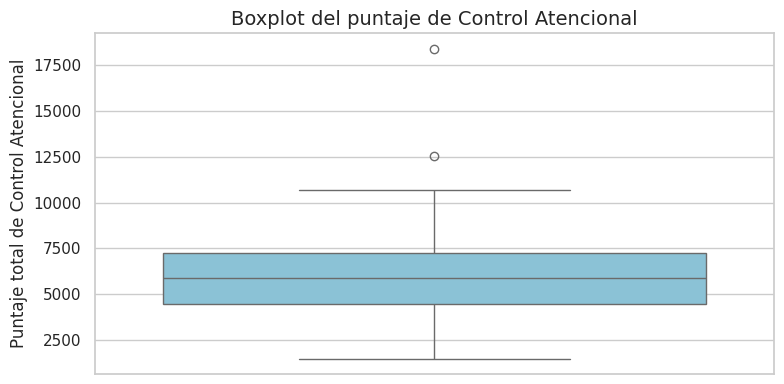

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=control_atencional_por_nino,
            y='suma_control_atencional',
            color="#7EC8E3")

plt.title("Boxplot del puntaje de Control Atencional", fontsize=14)
plt.ylabel("Puntaje total de Control Atencional")
plt.xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
#Vamos a calcular el puntaje de control atencional = sync_at_raw por mocoso!!
#Esto lo hacemos agrupando los resultados por ID (es decir por cada mocoso) y sumando todos los unitos de la columna nm_int :D

# Agrupo por pibe y sumo los valores de control atencional
sincronía_atencional_por_nino = dfn.groupby('ID')['sync_at_raw'].sum().reset_index()

# Cambio nombre de la columna para que se entienda mejor de qué estamos hablando porque nm_int es un chino
sincronía_atencional_por_nino.rename(columns={'sync_at_raw': 'suma_sincronía_atencional'}, inplace=True)

# Ver los primeros casos
sincronía_atencional_por_nino.head()

,ID,suma_sincronía_atencional
0,C3A02,5106
1,C3A03,3783
2,C3A04,2675
3,C3A07,3248
4,C3B04,3845


In [ ]:
#Ahora vamos con las descriptivas de esta variable!!!! :D
serie_2 = sincronía_atencional_por_nino['suma_sincronía_atencional']

print("DESCRIPTIVOS PARA 'suma_sincronía_atencional'")
print(f"N: {serie.count()}")
print(f"Perdidos: {serie.isnull().sum()}")
print(f"Media: {serie.mean():.2f}")
print(f"Mediana: {serie.median()}")
print(f"Moda: {serie.mode().iloc[0]}")
print(f"Desviación estándar: {serie.std():.2f}")
print(f"Mínimo: {serie.min()}")
print(f"Máximo: {serie.max()}")

DESCRIPTIVOS PARA 'suma_sincronía_atencional'
N: 69
Perdidos: 0
Media: 6202.58
Mediana: 5899.0
Moda: 1503.0
Desviación estándar: 2633.83
Mínimo: 1503.0
Máximo: 18383.0


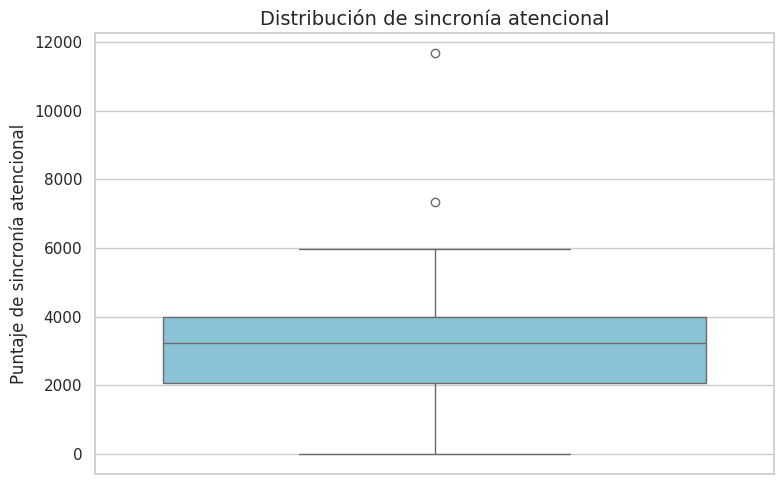

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo lindo
sns.set(style="whitegrid")

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=sincronía_atencional, y='suma_sincronía_atencional', color="#7EC8E3")

# Título y etiquetas
plt.title("Distribución de sincronía atencional", fontsize=14)
plt.ylabel("Puntaje de sincronía atencional")
plt.xlabel("")  # No hace falta eje X si solo hay una variable

# Mostrar gráfico
plt.tight_layout()
plt.show()

#Ahora vamos con sync_at_raw

In [ ]:
print(dfn['sync_at_raw'].unique())

[False True nan]


In [ ]:
# Agrupar por ID y sumar los TRUE (que ahora son 1)
control_atencional_2 = dfn.groupby('ID')['sync_at_raw'].sum().reset_index()

# Renombrar la columna para mayor claridad
control_atencional_2.rename(columns={'sync_at_raw': 'suma_control_atencional_2'}, inplace=True)

# Ver los primeros casos
control_atencional_2.head()

,ID,suma_control_atencional_2
0,C3A02,5106
1,C3A03,3783
2,C3A04,2675
3,C3A07,3248
4,C3B04,3845


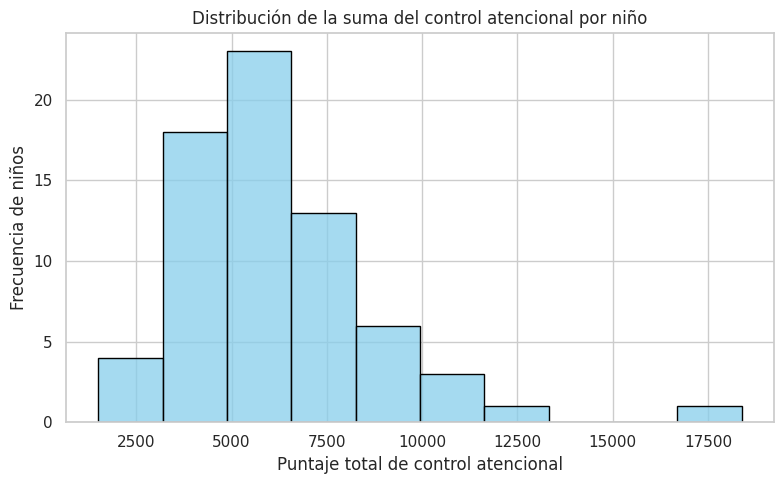

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo (opcional, solo para que se vea más lindo)
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(8, 5))
sns.histplot(
    data=control_atencional_por_nino,
    x='suma_control_atencional',
    bins=10,             # podés ajustar esto según cuántos valores distintos haya
    kde=False,           # cambiá a True si querés superponer la curva de densidad
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribución de la suma del control atencional por niño')
plt.xlabel('Puntaje total de control atencional')
plt.ylabel('Frecuencia de niños')
plt.tight_layout()
plt.show()

#**Análisis de correlaciones, etc, lo complejo y divertido jaja**


*Arranquemos con analizar relación entre EDUCACIÓN_DE_LA_MADRE y ESFUERZO.DE.CONTROL (subsdimensión del CBQ)*

¿Qué nos interesa? -> Ver si hay alguna asociación entre el nivel educativo de la madre y el control inhibitorio del pibe (según los antecedentes acá había asociación posible)

Entonces tenemos:
1. Variable predictora (ordinal): Educación_de_la_madre (nivel educativo codificado como 0-14).
2. Variable de resultado (cuantitativa continua): Esfuerzo_de_Control

¿Qué hacemos?
1. Podemos hacer una **correlación de Spearman**. Sirve para responder:  ¿Existe una relación monótona (no necesariamente lineal) entre las variables?. Evalúa asociación global con un solo número (ρ). No sinteresa para saber si están relacionadas de alguna manera!!  (nos vamos por spearman directamente porque trabajamos con valores ordinales -nivel educativo-)

2. O podemos hacer un análisis de **Boxplots** . Sirve para responder: ¿Cómo se distribuye el esfuerzo de control en cada nivel educativo?

Para redactar en resultados:
Dado que la variable ‘Educación_de_la_madre’ es ordinal y ‘Esfuerzo.de.control’ no cumplió con el supuesto de normalidad (Shapiro-Wilk, p < 0.05), se utilizó la correlación de Spearman. Esta prueba es adecuada para evaluar asociaciones monótonas entre variables ordinales y cuantitativas no normales"

In [ ]:
import scipy.stats as stats
from scipy.stats import spearmanr

#Eliminamos los datos faltantes
data = df[['Educación_de_la_madre', 'Esfuerzo.de.control']].dropna()

#Calculamos correlación de Spearman
corr, pval = spearmanr(data['Educación_de_la_madre'],data['Esfuerzo.de.control'])
print(f"Correlación de Spearman: ρ = {corr:.3f}, p-valor = {pval:.4f}")

# Interpretación
if pval < 0.05:
    print("✅ La correlación es significativa (p < 0.05).")
    if corr > 0:
        print("👉 Relación POSITIVA: A mayor educación, mayor esfuerzo de control.")
    else:
        print("👉 Relación NEGATIVA: A mayor educación, menor esfuerzo de control.")
else:
    print("❌ No hay evidencia de correlación significativa (p ≥ 0.05).")

Correlación de Spearman: ρ = 0.058, p-valor = 0.6453
❌ No hay evidencia de correlación significativa (p ≥ 0.05).


/tmp/ipython-input-9-4225127724.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


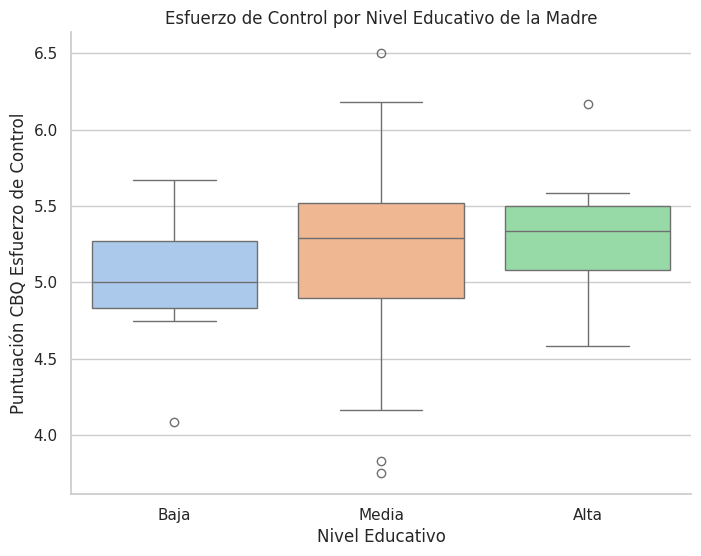

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear categorías de educación (ajusta los bins según tus datos)
df['Educación_de_la_madre'] = pd.cut(
    df['Educación_de_la_madre'],
    bins=[0, 5, 11, 14],  # Baja (0-5), Media (6-11), Alta (12-14)
    labels=['Baja', 'Media', 'Alta']
)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Educación_de_la_madre',
    y='Esfuerzo.de.control',
    data=df.dropna(subset=['Educación_de_la_madre', 'Esfuerzo.de.control']),
    palette='pastel'
)
plt.title('Esfuerzo de Control por Nivel Educativo de la Madre')
plt.xlabel('Nivel Educativo')
plt.ylabel('Puntuación CBQ Esfuerzo de Control')
sns.despine()
plt.show()

In [ ]:
from scipy.stats import kruskal

# Filtrar datos
grupos = df['Educación_de_la_madre'].dropna().unique()
datos_grupos = [df[df['Educación_de_la_madre'] == grupo]['Esfuerzo.de.control'].dropna() for grupo in grupos]

# Kruskal-Wallis (no paramétrico, similar a ANOVA pero para ordinales)
stat, pval = kruskal(*datos_grupos)
print(f"Kruskal-Wallis: H = {stat:.3f}, p-valor = {pval:.4f}")

if pval < 0.05:
    print("✅ Hay diferencias significativas entre al menos dos grupos.")
else:
    print("❌ No hay diferencias significativas entre grupos.")

Kruskal-Wallis: H = 2.039, p-valor = 0.3608
❌ No hay diferencias significativas entre grupos.


❌No dio nada


Ahora analicemos analizar relación entre la puntuación del CHAOS  y ESFUERZO.DE.CONTROL (subsdimensión del CBQ)

In [ ]:
from scipy.stats import spearmanr

# Eliminar filas con NaN
data = df[['CHAOS', 'Esfuerzo.de.control']].dropna()

# Calcular correlación
corr, pval = spearmanr(data['CHAOS'], data['Esfuerzo.de.control'])
print(f"Correlación de Spearman: ρ = {corr:.3f}, p-valor = {pval:.4f}")

# Interpretación
if pval < 0.05:
    direction = "negativa" if corr < 0 else "positiva"
    print(f"✅ Correlación significativa ({direction}).")
else:
    print("❌ No hay correlación significativa.")


from scipy.stats import pearsonr

corr, pval = pearsonr(data['CHAOS'], data['Esfuerzo.de.control'])
print(f"Correlación de Pearson: r = {corr:.3f}, p-valor = {pval:.4f}")

Correlación de Spearman: ρ = -0.050, p-valor = 0.7015
❌ No hay correlación significativa.
Correlación de Pearson: r = -0.053, p-valor = 0.6872


#Correlaciones entre "Control_Atencional" (etograma = nm_int) y PA (del woodCOCK)
#Luego correlaciones entre "Control_Atencional" y NeuroUX

Primero vamos a analizar la distribuciones a ver si son normales y usamos pruebas paramétricas, o no lo son y usamos no paramétricas
*probablemente el PA de normal y el NeuroUX no*

In [ ]:
#Primero voy a hacer un dataaset completo donde una tanto la info procesada del nm_int del etograma contenida en la variable llamada suma_control_atencional, junto con la info del resto de los análisis
#A su vez, esta función emparejja a los pibes y sus resultados por ID. ¿No es genial? amo esto jajajajaj

# Merge df and control_atencional_por_nino
df_completo = pd.merge(df, control_atencional_por_nino, on='ID', how='left')

# Merge the result with sincronía_atencional
df_completo = pd.merge(df_completo, sincronía_atencional, on='ID', how='left')

#corrió, excelente!

In [ ]:
#Ahora si, vamos con la prueba de normalidad
from scipy.stats import shapiro

# Lista de variables que querés testear
variables = ['suma_control_atencional', 'PA', 'tb_score', 'ne_score', 'mt_score', 'bcd_score']

# Test de normalidad de Shapiro para cada variable
for var in variables:
    datos = df_completo[var].dropna()  # Elimina NaN para el test
    stat, p = shapiro(datos)
    print(f"{var} → p = {p:.4f} {'✅ Normal' if p > 0.05 else '❌ No normal'} (N={len(datos)})")

suma_control_atencional → p = 0.0000 ❌ No normal (N=69)
PA → p = 0.2669 ✅ Normal (N=69)
tb_score → p = 0.0370 ❌ No normal (N=21)
ne_score → p = 0.0186 ❌ No normal (N=21)
mt_score → p = 0.3446 ✅ Normal (N=21)
bcd_score → p = 0.0010 ❌ No normal (N=21)


Listo, esto nos pone de cara a que, directamente, todo lo que involucre correlaciones entre "control atencional" con otra cosa se analizará con pruebas no paramétricas. Así que ....
#Correlación de Spearman para control_atencional con otras variables!
#*Referencia con los objetivos -> Objetivo específino nro 3*

In [ ]:
from scipy.stats import spearmanr

# Lista de pares de variables que querés correlacionar con control atencional
variables = ['PA', 'tb_score', 'ne_score', 'mt_score', 'bcd_score']

print("Correlaciones con suma_control_atencional (Spearman)\n")
for var in variables:
    subset = df_completo[['suma_control_atencional', var]].dropna()
    coef, p = spearmanr(subset['suma_control_atencional'], subset[var])
    print(f"{var}: r = {coef:.2f}, p = {p:.4f}, N = {len(subset)}")

Correlaciones con suma_control_atencional (Spearman)

PA: r = 0.03, p = 0.7897, N = 69
tb_score: r = 0.02, p = 0.9346, N = 21
ne_score: r = -0.27, p = 0.2424, N = 21
mt_score: r = -0.16, p = 0.4844, N = 21
bcd_score: r = 0.01, p = 0.9539, N = 21


#Traducción de lo anterior
NADA dió significativo de cruzar el nm_int (control atencional) con el PA de Woodcock, ni con las variables del neuroUX :(
¿Cómo se puede reportar esto en la tesis?

*No se encontraron correlaciones estadísticamente significativas entre el control atencional observado y los puntajes de funcionamiento ejecutivo medidos por el subtest de problemas aplicados (PA) ni por los subtests del test NeuroUX. Es posible que la escasa variabilidad en los puntajes, así como la baja cantidad de casos en algunas de las variables (especialmente NeuroUX), hayan limitado la potencia estadística de los análisis.*

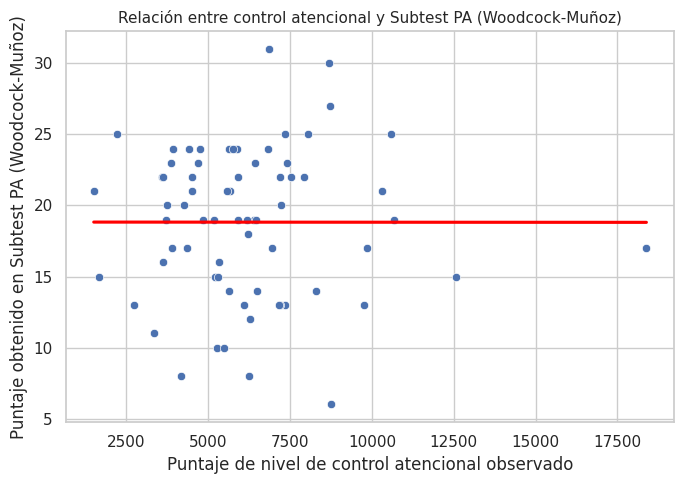

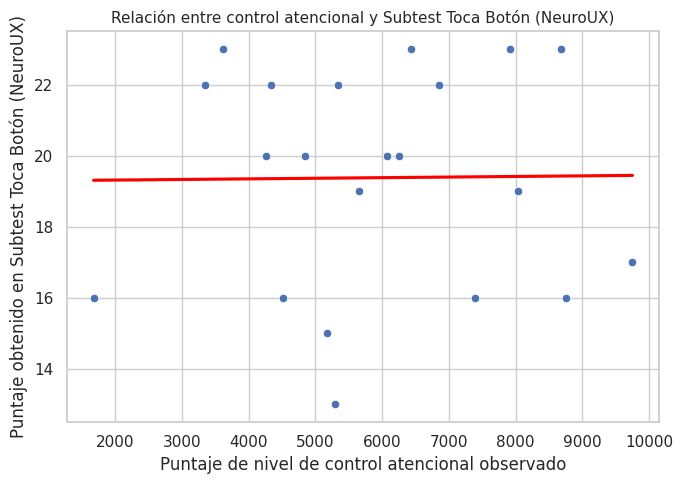

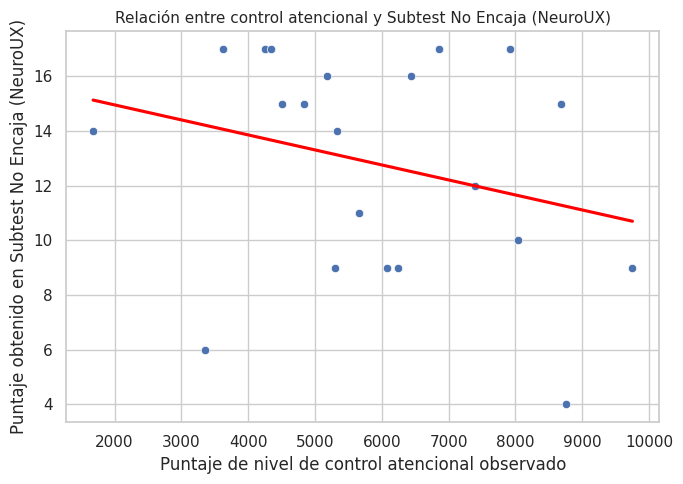

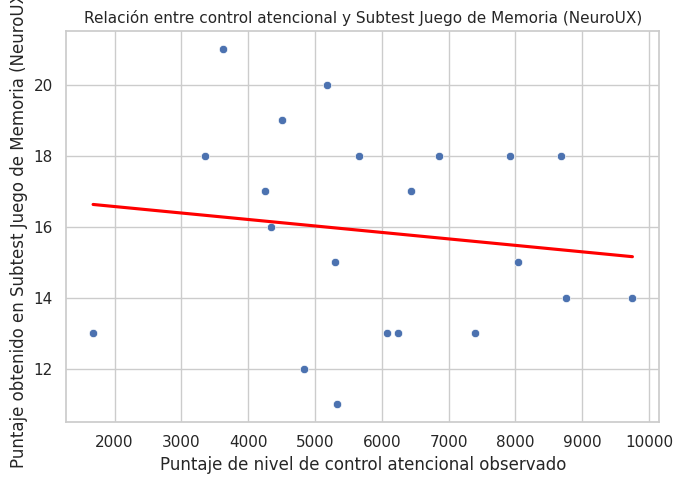

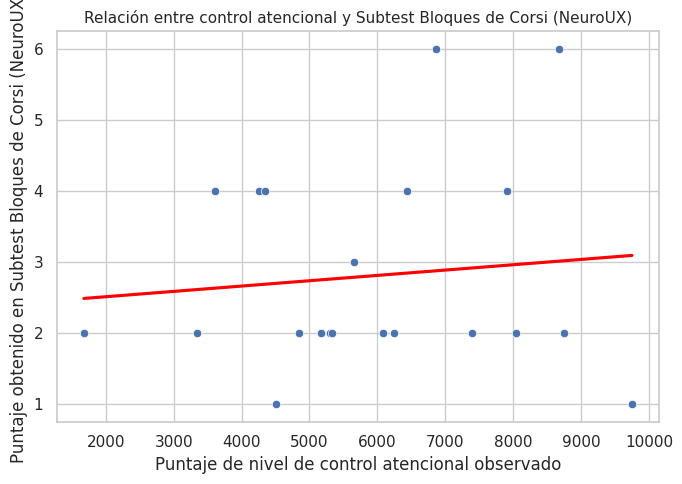

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario con nombres amables
nombres_amables = {
    'PA': 'Subtest PA (Woodcock-Muñoz)',
    'tb_score': 'Subtest Toca Botón (NeuroUX)',
    'ne_score': 'Subtest No Encaja (NeuroUX)',
    'mt_score': 'Subtest Juego de Memoria (NeuroUX)',
    'bcd_score': 'Subtest Bloques de Corsi (NeuroUX)'
}

# Etiqueta común para eje X
eje_x = 'Puntaje de nivel de control atencional observado'

# Gráfico para cada par
for var, nombre_lindo in nombres_amables.items():
    subset = df_completo[['suma_control_atencional', var]].dropna()

    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=subset, x='suma_control_atencional', y=var)
    sns.regplot(data=subset, x='suma_control_atencional', y=var, scatter=False, color='red', ci=None)
    plt.title(f'Relación entre control atencional y {nombre_lindo}', fontsize=11)
    plt.xlabel(eje_x)
    plt.ylabel(f'Puntaje obtenido en {nombre_lindo}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Lista de variables
variables = ['suma_control_atencional', 'PA', 'tb_score', 'ne_score', 'mt_score', 'bcd_score']

# Subset del DataFrame con solo esas variables
subset_corr = df_completo[variables]

# Calcular matriz de correlación Spearman
matriz_spearman = subset_corr.corr(method='spearman')

# Mostrarla
print(matriz_spearman.round(2))

                         suma_control_atencional    PA  tb_score  ne_score  \
suma_control_atencional                     1.00  0.03      0.02     -0.27   
PA                                          0.03  1.00      0.36      0.64   
tb_score                                    0.02  0.36      1.00      0.47   
ne_score                                   -0.27  0.64      0.47      1.00   
mt_score                                   -0.16  0.44      0.22      0.46   
bcd_score                                   0.01  0.58      0.70      0.67   

                         mt_score  bcd_score  
suma_control_atencional     -0.16       0.01  
PA                           0.44       0.58  
tb_score                     0.22       0.70  
ne_score                     0.46       0.67  
mt_score                     1.00       0.41  
bcd_score                    0.41       1.00  


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

# Variables de interés
variables = ['suma_control_atencional', 'PA', 'CO','tb_score', 'ne_score', 'mt_score', 'bcd_score']
subset = df_completo[variables]

# Inicializar matrices vacías
matriz_rho = pd.DataFrame(index=variables, columns=variables)
matriz_p = pd.DataFrame(index=variables, columns=variables)

# Calcular correlaciones y p-valores
for var1 in variables:
    for var2 in variables:
        datos = subset[[var1, var2]].dropna()

        # Solo calculamos si hay al menos 3 pares válidos
        if datos.shape[0] >= 3:
            rho, p = spearmanr(datos[var1], datos[var2])

            # Asegurar que sean escalares (no arrays)
            if isinstance(rho, np.ndarray):
                rho = np.nan
            if isinstance(p, np.ndarray):
                p = np.nan
        else:
            rho, p = np.nan, np.nan

        matriz_rho.loc[var1, var2] = round(rho, 2) if not pd.isnull(rho) else np.nan
        matriz_p.loc[var1, var2] = round(p, 4) if not pd.isnull(p) else np.nan

# Mostrar matrices
print("🔢 Matriz de correlaciones (Spearman):")
print(matriz_rho)

print("\n📉 Matriz de p-valores:")
print(matriz_p)

🔢 Matriz de correlaciones (Spearman):
                        suma_control_atencional    PA    CO tb_score ne_score  \
suma_control_atencional                     NaN  0.03  0.05     0.02    -0.27   
PA                                         0.03   NaN  0.73     0.36     0.64   
CO                                         0.05  0.73   NaN     0.34     0.67   
tb_score                                   0.02  0.36  0.34      NaN     0.47   
ne_score                                  -0.27  0.64  0.67     0.47      NaN   
mt_score                                  -0.16  0.44   0.6     0.22     0.46   
bcd_score                                  0.01  0.58  0.65      0.7     0.67   

                        mt_score bcd_score  
suma_control_atencional    -0.16      0.01  
PA                          0.44      0.58  
CO                           0.6      0.65  
tb_score                    0.22       0.7  
ne_score                    0.46      0.67  
mt_score                     NaN      0.41 

#Ahora vamos con los análisis del Objetivo específico nro 4
Incluye: variables sociodemográficas, CHAOS, CBQ, PA y CO, neuroUX y control cognitivo (del etograma nm_int)

In [ ]:
# Variables cognitivas, atencionales y de funciones ejecutivas
variables_test = [
    'suma_control_atencional',  # Control atencional observado (etograma)
    'suma_sincronía_atencional',
    'PA',                       # Subtest Problemas Aplicados (Woodcock-Muñoz)
    'CO',                       # Subtest Comprensión de Oraciones (Woodcock-Muñoz)
    'tb_score',                 # Toca Botón (NeuroUX)
    'ne_score',                 # No Encaja (NeuroUX)
    'mt_score',                 # Juego de Memoria (NeuroUX)
    'bcd_score',                # Bloques de Corsi (NeuroUX)
    'CHAOS',                    # Entorno familiar (CHAOS)
    'Extraversión',             # Subescala CBQ
    'Esfuerzo.de.control',      # Subescala CBQ
    'Afectividad.negativa'      # Subescala CBQ
]

# Variables sociodemográficas cuantificadas
variables_socio = [
    'Educación_de_la_madre',
    'Educación_del_padre',
    'Libros_en_el_hogar',
    'Frecuencia_de_lectura_compartida',
    'Materiales_didácticos_en_el_hogar',
    'Percepción_de_ingresos',
    'Percepción_de_recursos',
    'Percepción_de_calma',
    'Usa_dispositivos_electrónicos_cotidianamente',
]

# Lista completa
vars_todas = variables_test + variables_socio

In [ ]:
# Subconjunto con solo las columnas de interés
subset = df_completo[vars_todas]  # Asegurate de que df_completo tenga todo unido por ID

In [ ]:
import numpy as np
def matriz_spearman_con_p(dataframe):
    cols = dataframe.columns
    rho  = pd.DataFrame(index=cols, columns=cols, dtype=float)
    pval = pd.DataFrame(index=cols, columns=cols, dtype=float)

    for i in cols:
        for j in cols:
            pares = dataframe[[i, j]].dropna()
            if len(pares) >= 3:
                r_obj = spearmanr(pares[i], pares[j])
                # Extraer si devuelve matriz (array)
                r = r_obj.correlation if hasattr(r_obj, 'correlation') else r_obj[0]
                p = r_obj.pvalue if hasattr(r_obj, 'pvalue') else r_obj[1]
            else:
                r, p = np.nan, np.nan
            rho.loc[i, j]  = round(r, 2) if np.isscalar(r) else np.nan
            pval.loc[i, j] = round(p, 4) if np.isscalar(p) else np.nan

    return rho, pval

In [ ]:
# Llamás a la función y guardás los resultados
matriz_r, matriz_p = matriz_spearman_con_p(subset)

# Mostrás los resultados
print("📌 Matriz de correlaciones de Spearman (ρ)")
display(matriz_r)

print("📌 Matriz de p-valores correspondientes")
display(matriz_p)

📌 Matriz de correlaciones de Spearman (ρ)


,suma_control_atencional,suma_sincronía_atencional,PA,CO,tb_score,ne_score,mt_score,bcd_score,CHAOS,Extraversión,...,Afectividad.negativa,Educación_de_la_madre,Educación_del_padre,Libros_en_el_hogar,Frecuencia_de_lectura_compartida,Materiales_didácticos_en_el_hogar,Percepción_de_ingresos,Percepción_de_recursos,Percepción_de_calma,Usa_dispositivos_electrónicos_cotidianamente
suma_control_atencional,NaN,0.83,0.03,0.05,0.02,-0.27,-0.16,0.01,0.07,-0.10,...,0.11,0.03,0.11,0.04,-0.14,0.24,-0.20,-0.21,0.06,0.10
suma_sincronía_atencional,0.83,NaN,-0.00,0.06,-0.02,-0.29,-0.24,0.02,0.14,-0.05,...,0.20,-0.00,0.03,0.08,-0.19,0.11,-0.09,-0.03,0.02,0.11
PA,0.03,-0.00,NaN,0.73,0.36,0.64,0.44,0.58,0.08,-0.07,...,0.02,0.23,-0.07,0.24,0.20,0.24,-0.16,-0.19,-0.02,-0.00
CO,0.05,0.06,0.73,NaN,0.34,0.67,0.60,0.65,0.06,-0.17,...,0.09,0.22,0.05,0.20,0.09,0.23,-0.07,-0.05,0.06,0.08
tb_score,0.02,-0.02,0.36,0.34,NaN,0.47,0.22,0.70,-0.21,-0.33,...,0.01,0.17,-0.03,0.50,0.53,0.41,0.03,0.02,0.15,-0.02
ne_score,-0.27,-0.29,0.64,0.67,0.47,NaN,0.46,0.67,-0.21,-0.51,...,-0.03,0.22,0.23,0.02,0.15,0.28,0.21,0.05,0.20,0.14
mt_score,-0.16,-0.24,0.44,0.60,0.22,0.46,NaN,0.41,0.13,-0.05,...,-0.05,0.00,0.01,0.05,0.13,0.26,-0.15,0.02,0.08,0.28
bcd_score,0.01,0.02,0.58,0.65,0.70,0.67,0.41,NaN,0.02,-0.63,...,0.13,0.40,-0.11,0.36,0.46,0.19,0.11,0.34,0.45,0.02
CHAOS,0.07,0.14,0.08,0.06,-0.21,-0.21,0.13,0.02,NaN,-0.06,...,0.42,-0.03,0.01,0.01,0.01,-0.27,-0.18,0.10,-0.19,-0.05
Extraversión,-0.10,-0.05,-0.07,-0.17,-0.33,-0.51,-0.05,-0.63,-0.06,NaN,...,0.16,0.03,-0.11,0.13,0.16,0.21,0.13,0.03,-0.13,-0.17


📌 Matriz de p-valores correspondientes


,suma_control_atencional,suma_sincronía_atencional,PA,CO,tb_score,ne_score,mt_score,bcd_score,CHAOS,Extraversión,...,Afectividad.negativa,Educación_de_la_madre,Educación_del_padre,Libros_en_el_hogar,Frecuencia_de_lectura_compartida,Materiales_didácticos_en_el_hogar,Percepción_de_ingresos,Percepción_de_recursos,Percepción_de_calma,Usa_dispositivos_electrónicos_cotidianamente
suma_control_atencional,NaN,0.0000,0.7897,0.6829,0.9346,0.2424,0.4844,0.9539,0.5754,0.4341,...,0.3617,0.8052,0.4008,0.7290,0.2478,0.0526,0.1063,0.0901,0.6267,0.4096
suma_sincronía_atencional,0.0000,NaN,0.9771,0.6003,0.9436,0.2015,0.2983,0.9248,0.2995,0.6651,...,0.0928,0.9876,0.8305,0.5261,0.1252,0.3945,0.4967,0.8237,0.8926,0.3948
PA,0.7897,0.9771,NaN,0.0000,0.1099,0.0017,0.0445,0.0059,0.5156,0.5640,...,0.8864,0.0666,0.5778,0.0595,0.1041,0.0534,0.1998,0.1274,0.8833,0.9739
CO,0.6829,0.6003,0.0000,NaN,0.1273,0.0008,0.0037,0.0015,0.6326,0.1700,...,0.4567,0.0854,0.7227,0.1188,0.4884,0.0625,0.5568,0.7001,0.6084,0.5281
tb_score,0.9346,0.9436,0.1099,0.1273,NaN,0.0303,0.3330,0.0004,0.4058,0.1484,...,0.9490,0.4750,0.9212,0.0252,0.0152,0.0718,0.9067,0.9298,0.5323,0.9322
ne_score,0.2424,0.2015,0.0017,0.0008,0.0303,NaN,0.0357,0.0010,0.4108,0.0180,...,0.8939,0.3453,0.3810,0.9173,0.5353,0.2348,0.3800,0.8231,0.4083,0.5502
mt_score,0.4844,0.2983,0.0445,0.0037,0.3330,0.0357,NaN,0.0638,0.6047,0.8232,...,0.8227,0.9934,0.9809,0.8299,0.5832,0.2618,0.5181,0.9417,0.7383,0.2251
bcd_score,0.9539,0.9248,0.0059,0.0015,0.0004,0.0010,0.0638,NaN,0.9353,0.0021,...,0.5862,0.0797,0.6725,0.1228,0.0393,0.4297,0.6468,0.1412,0.0453,0.9280
CHAOS,0.5754,0.2995,0.5156,0.6326,0.4058,0.4108,0.6047,0.9353,NaN,0.6191,...,0.0008,0.8162,0.9147,0.9220,0.9187,0.0359,0.1897,0.4607,0.1389,0.6895
Extraversión,0.4341,0.6651,0.5640,0.1700,0.1484,0.0180,0.8232,0.0021,0.6191,NaN,...,0.1870,0.8418,0.4118,0.3180,0.1920,0.0950,0.2895,0.7888,0.2920,0.1776


In [ ]:
import pandas as pd

# Mostramos todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Mostramos los resultados completos
print("📌 Matriz de correlaciones de Spearman (ρ)")
display(matriz_r)

print("📌 Matriz de p-valores correspondientes")
display(matriz_p)

📌 Matriz de correlaciones de Spearman (ρ)


,suma_control_atencional,suma_sincronía_atencional,PA,CO,tb_score,ne_score,mt_score,bcd_score,CHAOS,Extraversión,Esfuerzo.de.control,Afectividad.negativa,Educación_de_la_madre,Educación_del_padre,Libros_en_el_hogar,Frecuencia_de_lectura_compartida,Materiales_didácticos_en_el_hogar,Percepción_de_ingresos,Percepción_de_recursos,Percepción_de_calma,Usa_dispositivos_electrónicos_cotidianamente
suma_control_atencional,NaN,0.83,0.03,0.05,0.02,-0.27,-0.16,0.01,0.07,-0.10,-0.04,0.11,0.03,0.11,0.04,-0.14,0.24,-0.20,-0.21,0.06,0.10
suma_sincronía_atencional,0.83,NaN,-0.00,0.06,-0.02,-0.29,-0.24,0.02,0.14,-0.05,-0.12,0.20,-0.00,0.03,0.08,-0.19,0.11,-0.09,-0.03,0.02,0.11
PA,0.03,-0.00,NaN,0.73,0.36,0.64,0.44,0.58,0.08,-0.07,0.27,0.02,0.23,-0.07,0.24,0.20,0.24,-0.16,-0.19,-0.02,-0.00
CO,0.05,0.06,0.73,NaN,0.34,0.67,0.60,0.65,0.06,-0.17,0.15,0.09,0.22,0.05,0.20,0.09,0.23,-0.07,-0.05,0.06,0.08
tb_score,0.02,-0.02,0.36,0.34,NaN,0.47,0.22,0.70,-0.21,-0.33,-0.01,0.01,0.17,-0.03,0.50,0.53,0.41,0.03,0.02,0.15,-0.02
ne_score,-0.27,-0.29,0.64,0.67,0.47,NaN,0.46,0.67,-0.21,-0.51,0.29,-0.03,0.22,0.23,0.02,0.15,0.28,0.21,0.05,0.20,0.14
mt_score,-0.16,-0.24,0.44,0.60,0.22,0.46,NaN,0.41,0.13,-0.05,0.24,-0.05,0.00,0.01,0.05,0.13,0.26,-0.15,0.02,0.08,0.28
bcd_score,0.01,0.02,0.58,0.65,0.70,0.67,0.41,NaN,0.02,-0.63,0.20,0.13,0.40,-0.11,0.36,0.46,0.19,0.11,0.34,0.45,0.02
CHAOS,0.07,0.14,0.08,0.06,-0.21,-0.21,0.13,0.02,NaN,-0.06,-0.05,0.42,-0.03,0.01,0.01,0.01,-0.27,-0.18,0.10,-0.19,-0.05
Extraversión,-0.10,-0.05,-0.07,-0.17,-0.33,-0.51,-0.05,-0.63,-0.06,NaN,0.03,0.16,0.03,-0.11,0.13,0.16,0.21,0.13,0.03,-0.13,-0.17


📌 Matriz de p-valores correspondientes


,suma_control_atencional,suma_sincronía_atencional,PA,CO,tb_score,ne_score,mt_score,bcd_score,CHAOS,Extraversión,Esfuerzo.de.control,Afectividad.negativa,Educación_de_la_madre,Educación_del_padre,Libros_en_el_hogar,Frecuencia_de_lectura_compartida,Materiales_didácticos_en_el_hogar,Percepción_de_ingresos,Percepción_de_recursos,Percepción_de_calma,Usa_dispositivos_electrónicos_cotidianamente
suma_control_atencional,NaN,0.0000,0.7897,0.6829,0.9346,0.2424,0.4844,0.9539,0.5754,0.4341,0.7275,0.3617,0.8052,0.4008,0.7290,0.2478,0.0526,0.1063,0.0901,0.6267,0.4096
suma_sincronía_atencional,0.0000,NaN,0.9771,0.6003,0.9436,0.2015,0.2983,0.9248,0.2995,0.6651,0.3221,0.0928,0.9876,0.8305,0.5261,0.1252,0.3945,0.4967,0.8237,0.8926,0.3948
PA,0.7897,0.9771,NaN,0.0000,0.1099,0.0017,0.0445,0.0059,0.5156,0.5640,0.0228,0.8864,0.0666,0.5778,0.0595,0.1041,0.0534,0.1998,0.1274,0.8833,0.9739
CO,0.6829,0.6003,0.0000,NaN,0.1273,0.0008,0.0037,0.0015,0.6326,0.1700,0.2210,0.4567,0.0854,0.7227,0.1188,0.4884,0.0625,0.5568,0.7001,0.6084,0.5281
tb_score,0.9346,0.9436,0.1099,0.1273,NaN,0.0303,0.3330,0.0004,0.4058,0.1484,0.9499,0.9490,0.4750,0.9212,0.0252,0.0152,0.0718,0.9067,0.9298,0.5323,0.9322
ne_score,0.2424,0.2015,0.0017,0.0008,0.0303,NaN,0.0357,0.0010,0.4108,0.0180,0.2087,0.8939,0.3453,0.3810,0.9173,0.5353,0.2348,0.3800,0.8231,0.4083,0.5502
mt_score,0.4844,0.2983,0.0445,0.0037,0.3330,0.0357,NaN,0.0638,0.6047,0.8232,0.2905,0.8227,0.9934,0.9809,0.8299,0.5832,0.2618,0.5181,0.9417,0.7383,0.2251
bcd_score,0.9539,0.9248,0.0059,0.0015,0.0004,0.0010,0.0638,NaN,0.9353,0.0021,0.3826,0.5862,0.0797,0.6725,0.1228,0.0393,0.4297,0.6468,0.1412,0.0453,0.9280
CHAOS,0.5754,0.2995,0.5156,0.6326,0.4058,0.4108,0.6047,0.9353,NaN,0.6191,0.7015,0.0008,0.8162,0.9147,0.9220,0.9187,0.0359,0.1897,0.4607,0.1389,0.6895
Extraversión,0.4341,0.6651,0.5640,0.1700,0.1484,0.0180,0.8232,0.0021,0.6191,NaN,0.7995,0.1870,0.8418,0.4118,0.3180,0.1920,0.0950,0.2895,0.7888,0.2920,0.1776


#VAMOS A HACER COMPARACIONES DE GRUPO AHORAAA
#*Básicamente es lo que en el anteproyecto mencionamos como "prueba t". Cabe aclarar que, ya que la mayoría de las distribuciones NO son normales, utilizaremos pruebas NO PARAMÉTRICAS es decir: Mann-Whitney para dos grupos y Kruskal-Wallis para más de dos.*



PRIMERA PRUEBA -> Control atencional (etograma) y Materiales didacticos (había dado una correlación de r = .64 (p < .05).. no es una correlación alta, pero me da curiosidad chusmear esto)

In [ ]:
from scipy.stats import kruskal

# Ver la cantidad de casos por grupo
print(df_completo['Materiales_didácticos_en_el_hogar'].value_counts())

# Kruskal-Wallis
kruskal(*[grupo['suma_control_atencional'].dropna()
          for valor, grupo in df_completo.groupby('Materiales_didácticos_en_el_hogar')])

#No dió significativa

Materiales_didácticos_en_el_hogar
3.0    62
2.0     5
Name: count, dtype: int64


KruskalResult(statistic=np.float64(3.734914611005678), pvalue=np.float64(0.053286390285236546))

SEGUNDA PRUEBA -> Control atencional (etograma) y Percepción de ingresos (dió una correlación inverda sde -.20 (sin p valor significativo). Vamos a chusmear igual a ver qué da

In [ ]:
from scipy.stats import kruskal

# Ver la cantidad de casos por grupo
print(df_completo['Percepción_de_ingresos'].value_counts())

# Kruskal-Wallis
kruskal(*[grupo['suma_control_atencional'].dropna()
          for valor, grupo in df_completo.groupby('Percepción_de_ingresos')])

#No dió significativa

NameError: name 'df_completo' is not defined

TERCERA PRUEBA -> Cantidad de libros y Subtest PA ya que dieron correlación bajita pero significativa  r = .24* (p < .05)

In [ ]:
from scipy.stats import kruskal

# Ver la cantidad de casos por grupo
print(df_completo['Libros_en_el_hogar'].value_counts())

# Kruskal-Wallis
kruskal(*[grupo['PA'].dropna()
          for valor, grupo in df_completo.groupby('Libros_en_el_hogar')])

#No dió significativa

Libros_en_el_hogar
2.0    38
1.0    14
3.0    11
Name: count, dtype: int64


KruskalResult(statistic=np.float64(3.8882499842897853), pvalue=np.float64(0.14311239303594192))

CUARTA PRUEBA -> Materiales didácticos y Subtest PA ya que dieron correlación bajita pero significativa  r = .24* (p < .05)

In [ ]:
from scipy.stats import kruskal

# Ver la cantidad de casos por grupo
#print(df_completo['Materiales_didácticos_en_el_hogar'].value_counts())

# Kruskal-Wallis
kruskal(*[grupo['PA'].dropna()
          for valor, grupo in df_completo.groupby('Materiales_didácticos_en_el_hogar')])

#No dió significativa, solo de re pedo y la verdad que no es un resultado realmente considerable ya que los grupos de "materiales didacticos" son extremadamente dispares

KruskalResult(statistic=np.float64(3.708407945165236), pvalue=np.float64(0.05413900700285427))

QUINTA PRUEBA -> Cantidad de libros en el hogar y Subtest TB de neuroUX ya que dieron correlación bajita pero significativa  r = .50* (p < .05)

In [ ]:
from scipy.stats import kruskal

# Ver la cantidad de casos por grupo
#print(df_completo['Materiales_didácticos_en_el_hogar'].value_counts())

# Kruskal-Wallis
kruskal(*[grupo['tb_score'].dropna()
          for valor, grupo in df_completo.groupby('Libros_en_el_hogar')])

#no dió significativo


KruskalResult(statistic=np.float64(5.479389707783816), pvalue=np.float64(0.06459005328973329))

SEXTA PRUEBA -> Frecuencia de lectura y Subtest TB de neuroUX ya que dieron correlación bajita pero significativa  r = .53** (p < .01)

In [ ]:
from scipy.stats import kruskal

# Ver la cantidad de casos por grupo
print(df_completo['Frecuencia_de_lectura_compartida'].value_counts())

# Kruskal-Wallis
kruskal(*[grupo['tb_score'].dropna()
          for valor, grupo in df_completo.groupby('Frecuencia_de_lectura_compartida')])

#no dió significativa


Frecuencia_de_lectura_compartida
3.0    26
2.0    22
1.0    11
0.0     7
Name: count, dtype: int64


KruskalResult(statistic=np.float64(5.572579950004304), pvalue=np.float64(0.1343614081429992))

SEPTIMA PRUEBA -> Materialez didácticos y Subtest TB de neuroUX ya que dieron correlación bajita pero significativa  r = .41 (p no significativo)

ya esoty perdiendo la fe xd

In [ ]:
from scipy.stats import kruskal

# Ver la cantidad de casos por grupo
print(df_completo['Materiales_didácticos_en_el_hogar'].value_counts())

# Kruskal-Wallis
kruskal(*[grupo['tb_score'].dropna()
          for valor, grupo in df_completo.groupby('Materiales_didácticos_en_el_hogar')])

#no dió significativa


Materiales_didácticos_en_el_hogar
3.0    62
2.0     5
Name: count, dtype: int64


KruskalResult(statistic=np.float64(3.2100680975777838), pvalue=np.float64(0.07318643733982765))

OCTAVA PRUEBA -> educación de la madre y Subtest TB de neuroUX

definitivamente estoy perdiendo la fe xd

In [ ]:
def agrupar_educacion(nivel):
    if nivel in [0, 1, 2]:
        return 'Primaria'
    elif nivel in [3, 4, 5]:
        return 'Secundaria'
    elif nivel in [6, 7, 8]:
        return 'Terciaria'
    elif nivel in [9, 10, 11]:
        return 'Universitaria'
    else:
        return 'Posgrado'

df_completo['Educación_madre_grupos'] = df_completo['Educación_de_la_madre'].apply(agrupar_educacion)

In [ ]:
from scipy.stats import kruskal

# Revisar cuántos casos por grupo hay
print(df_completo['Educación_madre_grupos'].value_counts())

# Prueba Kruskal-Wallis con tb_score
kruskal(*[grupo['tb_score'].dropna()
          for valor, grupo in df_completo.groupby('Educación_madre_grupos')])

Educación_madre_grupos
Universitaria    32
Terciaria        16
Posgrado         11
Secundaria       10
Name: count, dtype: int64


KruskalResult(statistic=np.float64(5.717885998072791), pvalue=np.float64(0.12617211149670066))

In [ ]:
from scipy.stats import kruskal


# Kruskal-Wallis
kruskal(*[grupo['bcd_score'].dropna()
          for valor, grupo in df_completo.groupby('Frecuencia_de_lectura_compartida')])

KruskalResult(statistic=np.float64(5.210824341401758), pvalue=np.float64(0.1569946593602429))

In [ ]:
from scipy.stats import kruskal


# Kruskal-Wallis
kruskal(*[grupo['bcd_score'].dropna()
          for valor, grupo in df_completo.groupby('Libros_en_el_hogar')])

KruskalResult(statistic=np.float64(2.5072907553222437), pvalue=np.float64(0.28546228001220697))

In [ ]:
from scipy.stats import kruskal


# Kruskal-Wallis
kruskal(*[grupo['bcd_score'].dropna()
          for valor, grupo in df_completo.groupby('Percepción_de_calma')])

KruskalResult(statistic=np.float64(4.412495313085853), pvalue=np.float64(0.22022957442158567))

YANOSEQUÉ NUMERO DE PRUEBA -> Maeriales didácticcos en el hogar y puntaje del CHAOS que dió correlación significativa inversa r = -.27* (p < .05)

In [ ]:
from scipy.stats import kruskal

# Kruskal-Wallis
kruskal(*[grupo['CHAOS'].dropna()
          for valor, grupo in df_completo.groupby('Materiales_didácticos_en_el_hogar')])

#dio significativa aaaaaaaaaaa


KruskalResult(statistic=np.float64(4.346982326196916), pvalue=np.float64(0.03707458342131394))

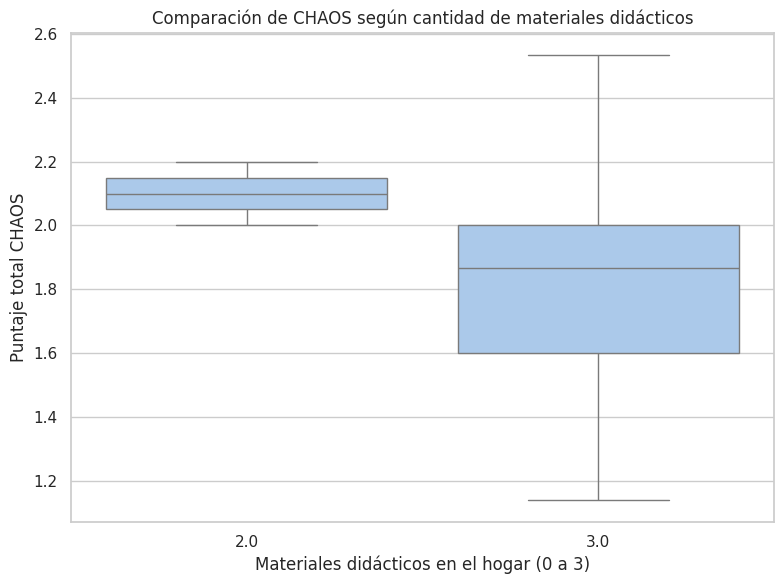

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustes de estilo
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_completo,
            x='Materiales_didácticos_en_el_hogar',
            y='CHAOS')

# Etiquetas y título
plt.xlabel("Materiales didácticos en el hogar (0 a 3)")
plt.ylabel("Puntaje total CHAOS")
plt.title("Comparación de CHAOS según cantidad de materiales didácticos")
plt.tight_layout()
plt.show()

YANOSEQUÉ NUMERO DE PRUEBA -> Frecuencia de lectura compartida y puntaje de Esfuerzo de Control del CBQ que dió correlación significativa r = 0.32** (p < .01)

In [ ]:
from scipy.stats import kruskal

# Kruskal-Wallis
kruskal(*[grupo['Esfuerzo.de.control'].dropna()
          for valor, grupo in df_completo.groupby('Frecuencia_de_lectura_compartida')])

#dio significativa aaaaaaaaaaa

KruskalResult(statistic=np.float64(8.328259365768016), pvalue=np.float64(0.039693051943197256))

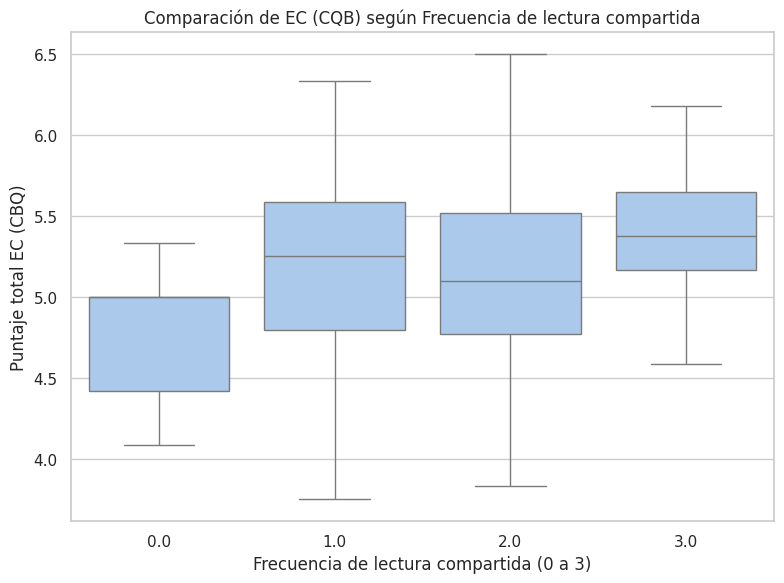

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustes de estilo
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_completo,
            x='Frecuencia_de_lectura_compartida',
            y='Esfuerzo.de.control')

# Etiquetas y título
plt.xlabel("Frecuencia de lectura compartida (0 a 3)")
plt.ylabel("Puntaje total EC (CBQ)")
plt.title("Comparación de EC (CQB) según Frecuencia de lectura compartida")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import kruskal

# Kruskal-Wallis
kruskal(*[grupo['Extraversión'].dropna()
          for valor, grupo in df_completo.groupby('Libros_en_el_hogar')])

#No dió significativa


KruskalResult(statistic=np.float64(1.477891228981998), pvalue=np.float64(0.4776172428235793))

In [ ]:

from scipy.stats import kruskal

# Kruskal-Wallis
kruskal(*[grupo['mt_score'].dropna()
          for valor, grupo in df_completo.groupby('Usa_dispositivos_electrónicos_cotidianamente')])

KruskalResult(statistic=np.float64(1.5313287072731863), pvalue=np.float64(0.21591313896634656))